<a href="https://colab.research.google.com/github/mayurjavare/HPC-DL/blob/main/DL_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


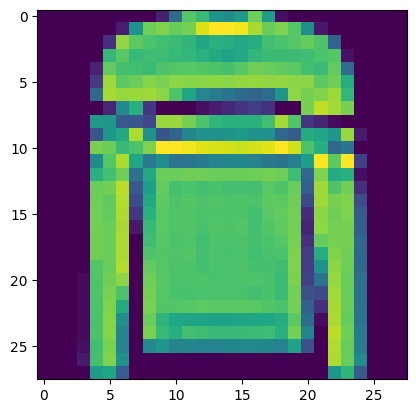

In [3]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

fashion_mnist_labels = ["T-shirt/top",
                        "Trouser",
                        "Pullover",
                        "Dress",
                        "Coat",
                        "Sandal",
                        "Shirt",
                        "Sneaker",
                        "Bag",
                        "Ankle boot"]

img_index = 5
label_index = y_train[img_index]
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
plt.imshow(x_train[img_index])

In [4]:
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

x_train.shape

(60000, 28, 28, 1)

In [5]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

model = tf.keras.Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [6]:
BATCH_SIZE=1000
EPOCHS = 20

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
%time history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=1)

Epoch 1/20
48/48 [==============================] - 71s 1s/step - loss: 8.1851 - accuracy: 0.3853 - val_loss: 0.9769 - val_accuracy: 0.6385
Epoch 2/20
48/48 [==============================] - 67s 1s/step - loss: 1.2020 - accuracy: 0.5773 - val_loss: 0.7774 - val_accuracy: 0.7297
Epoch 3/20
48/48 [==============================] - 69s 1s/step - loss: 0.9333 - accuracy: 0.6632 - val_loss: 0.6542 - val_accuracy: 0.7743
Epoch 4/20
48/48 [==============================] - 69s 1s/step - loss: 0.8179 - accuracy: 0.7017 - val_loss: 0.5840 - val_accuracy: 0.7977
Epoch 5/20
48/48 [==============================] - 69s 1s/step - loss: 0.7388 - accuracy: 0.7250 - val_loss: 0.5380 - val_accuracy: 0.7975
Epoch 6/20
48/48 [==============================] - 90s 2s/step - loss: 0.6870 - accuracy: 0.7448 - val_loss: 0.4960 - val_accuracy: 0.8240
Epoch 7/20
48/48 [==============================] - 70s 1s/step - loss: 0.6494 - accuracy: 0.7569 - val_loss: 0.4641 - val_accuracy: 0.8334
Epoch 8/20
48/48 [==

In [7]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, batch_size=BATCH_SIZE)
train_accuracy

60/60 [==============================] - 24s 398ms/step - loss: 0.3385 - accuracy: 0.8758


0.8758166432380676

313/313 [==============================] - 5s 14ms/step


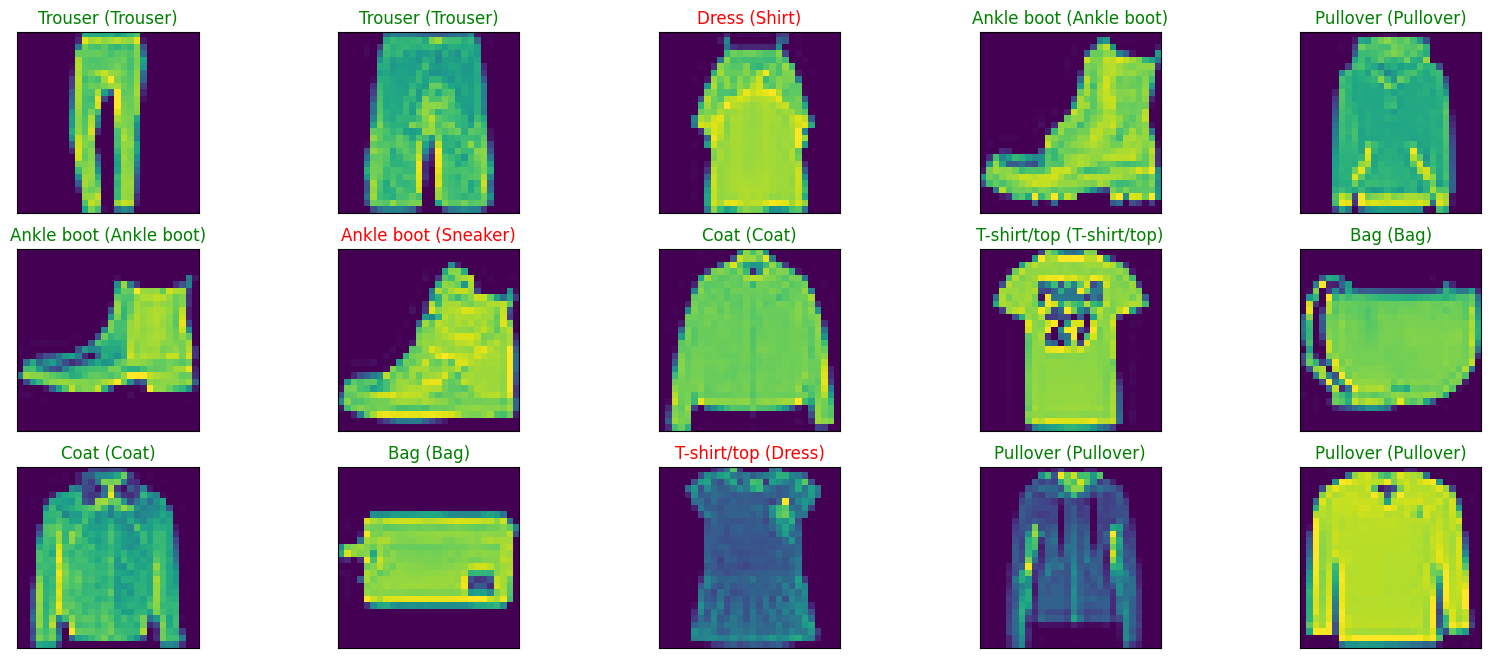

In [8]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))